In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Explore

In [185]:
df = pd.read_csv('./loans_full_schema.csv')

### Obeserve correlation

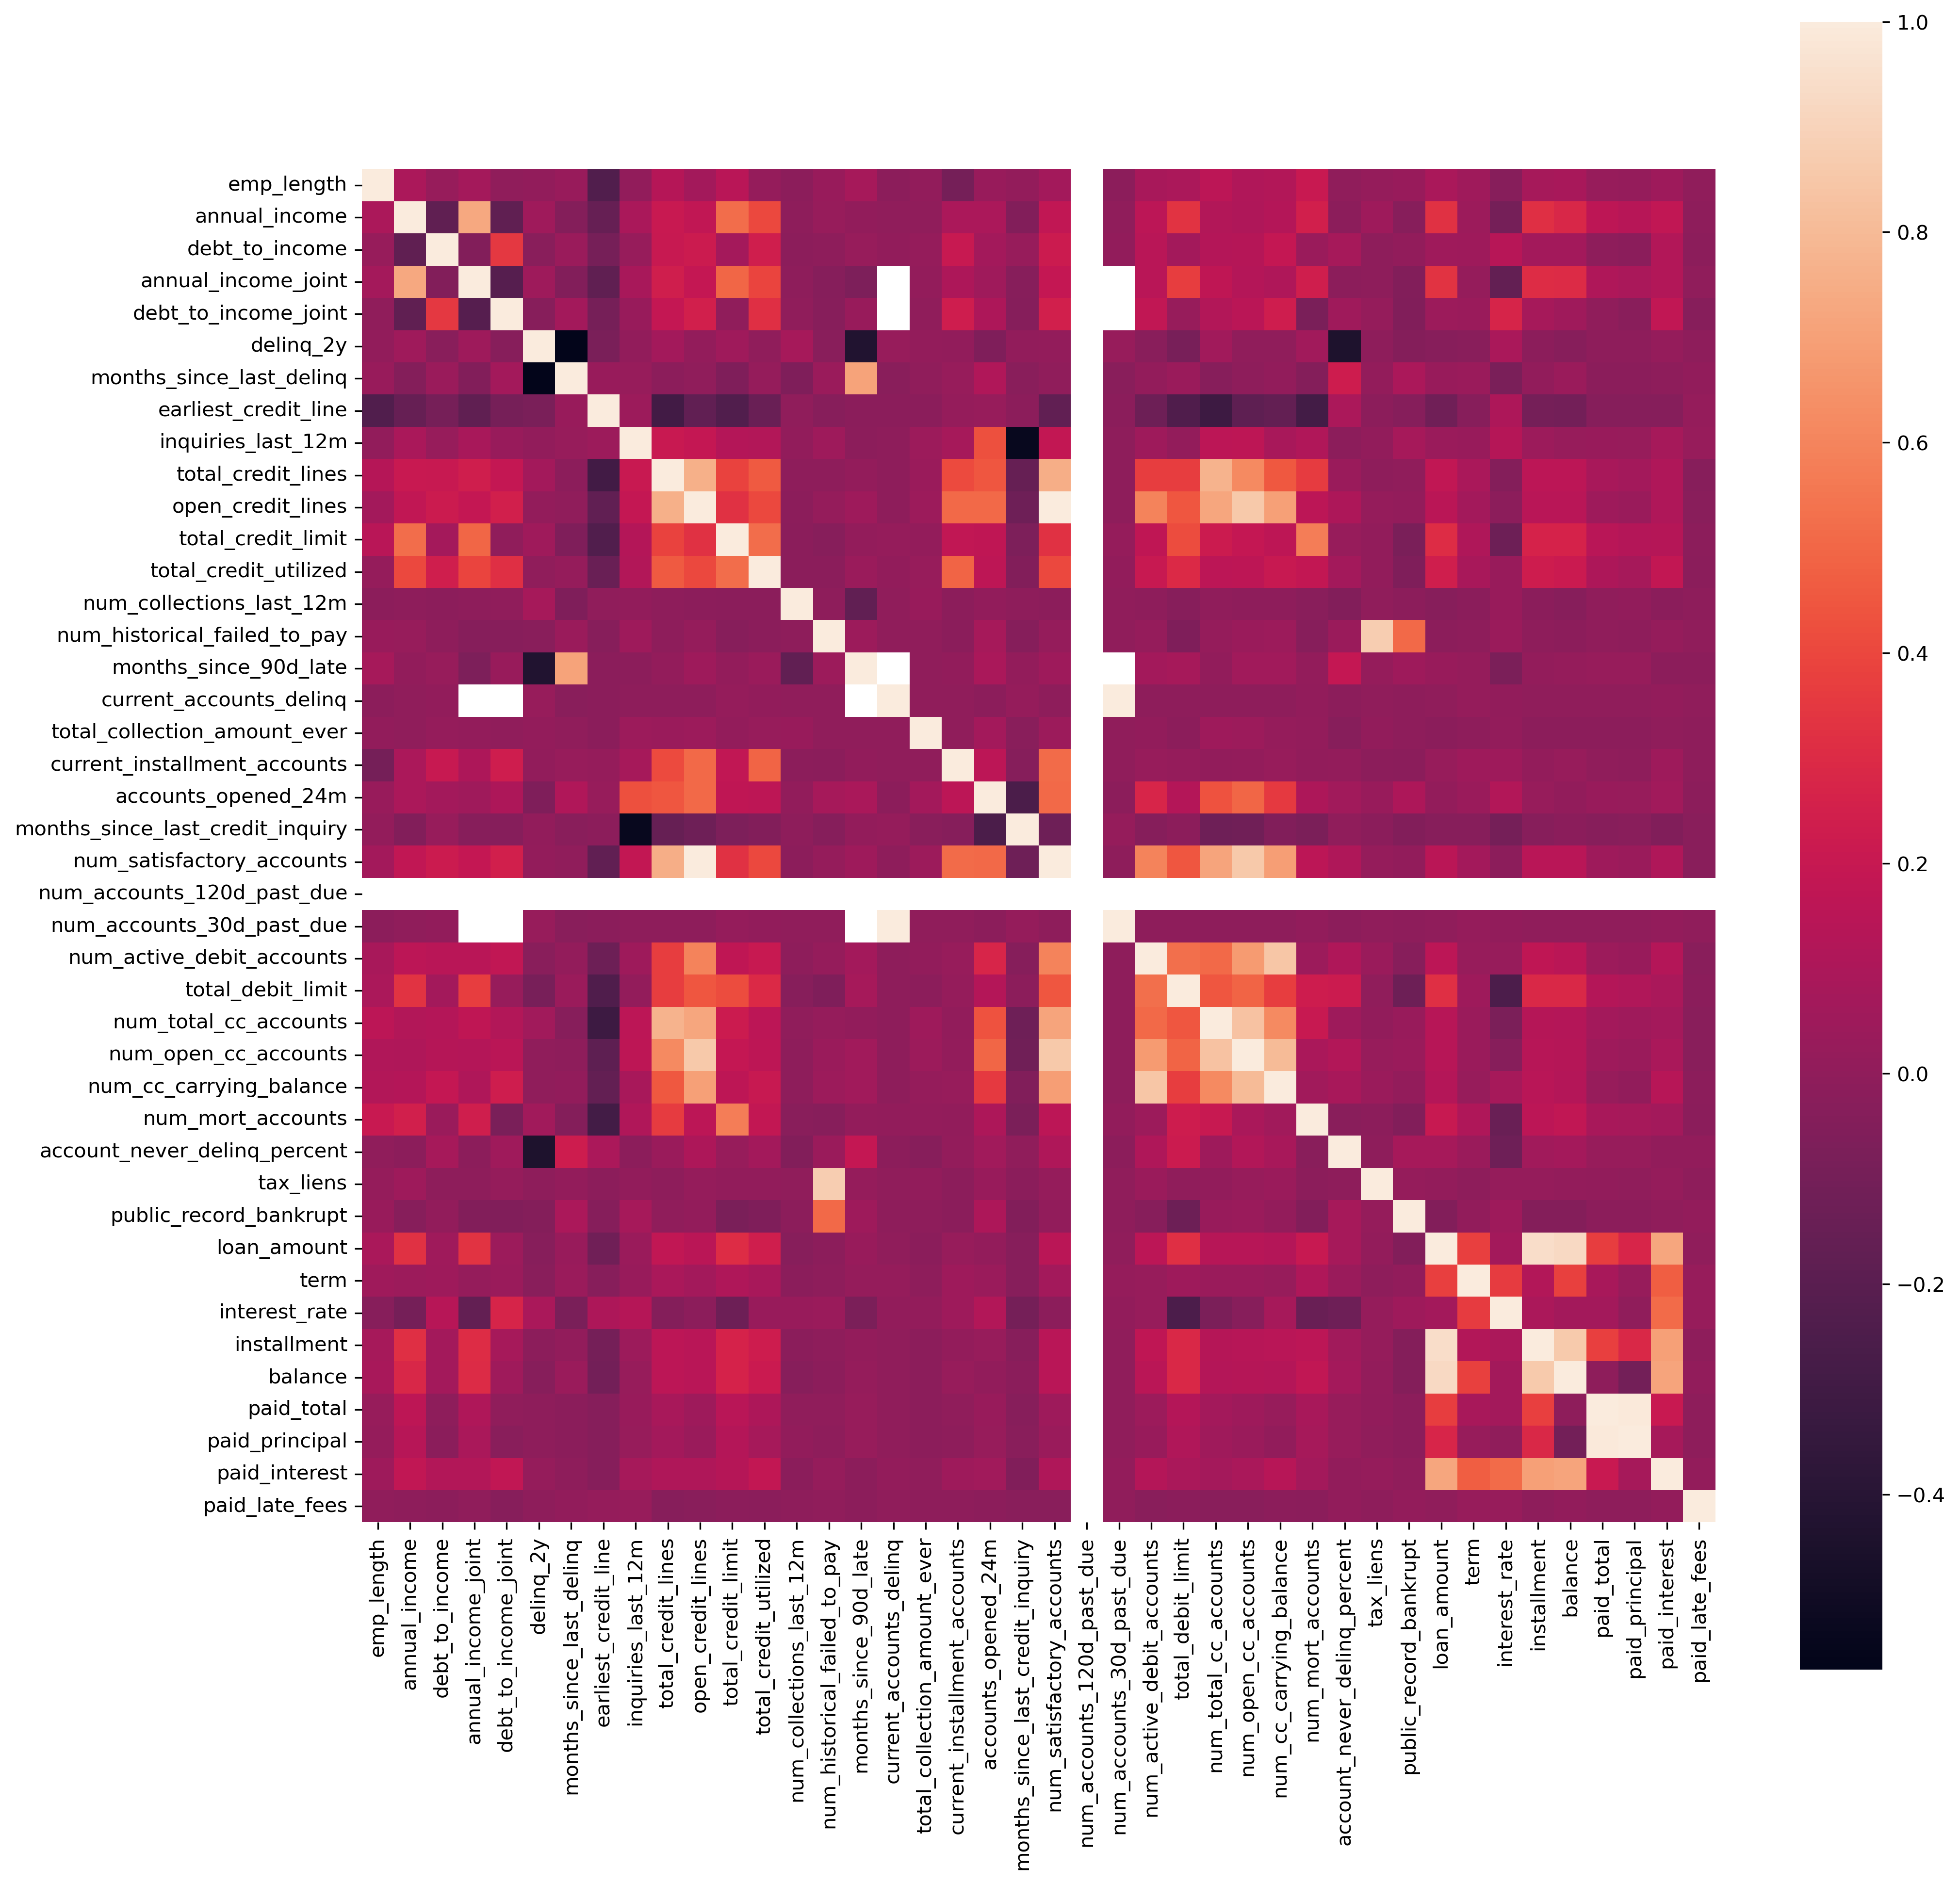

In [165]:
plt.figure(figsize=(15,15), dpi=300)
sns.heatmap(df.corr(), square=True)
plt.savefig('./heatmap.png')

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
emp_length,9183.0,5.930306,3.703734,0.00,2.0000,6.000,10.0000,1.000000e+01
annual_income,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.000,95000.0000,2.300000e+06
debt_to_income,9976.0,19.308192,15.004851,0.00,11.0575,17.570,25.0025,4.690900e+02
annual_income_joint,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.000,151545.5000,1.100000e+06
debt_to_income_joint,1495.0,19.979304,8.054781,0.32,14.1600,19.720,25.5000,3.998000e+01
delinq_2y,10000.0,0.216000,0.683660,0.00,0.0000,0.000,0.0000,1.300000e+01
months_since_last_delinq,4342.0,36.760709,21.634939,1.00,19.0000,34.000,53.0000,1.180000e+02
earliest_credit_line,10000.0,2001.290000,7.795510,1963.00,1997.0000,2003.000,2006.0000,2.015000e+03
inquiries_last_12m,10000.0,1.958200,2.380130,0.00,0.0000,1.000,3.0000,2.900000e+01
total_credit_lines,10000.0,22.679600,11.885439,2.00,14.0000,21.000,29.0000,8.700000e+01


In [183]:
print('{} rows have paid total != paid late fees + paid principal + paid interest.'\
      .format(df[df.paid_interest + df.paid_late_fees + df.paid_principal - df.paid_total > 0.01].shape[0]))

0 rows have paid total != paid late fees + paid principal + paid interest.


In [192]:
print('{} rows have paid more or equal to loan amount times interest rate.'\
      .format(df[df.paid_interest - (df.loan_amount * df.interest_rate * 0.01) > 0.1].shape[0]))

0 rows have paid more or equal to loan amount times interest rate.


In [191]:
df.head().T

,0,1,2,3,4
emp_title,global config engineer,warehouse office clerk,assembly,customer service,security supervisor
emp_length,3.0,10.0,3.0,1.0,10.0
state,NJ,HI,WI,PA,CA
homeownership,MORTGAGE,RENT,RENT,RENT,RENT
annual_income,90000.0,40000.0,40000.0,30000.0,35000.0
verified_income,Verified,Not Verified,Source Verified,Not Verified,Verified
debt_to_income,18.01,5.04,21.15,10.16,57.96
annual_income_joint,NaN,NaN,NaN,NaN,57000.0
verification_income_joint,NaN,NaN,NaN,NaN,Verified
debt_to_income_joint,NaN,NaN,NaN,NaN,37.66


It seemed like even for those finished loans, the paid interest some how didn't match the loan amount multiplied to the interest rate.

### Turn interest rate into categories for easier visualization

In [175]:
df.interest_rate = df.interest_rate // 5 * 5
df.interest_rate.replace([5, 10, 15, 20, 25, 30], ['5-10', '10-15', '15-20', '20-25', '25-30', '30+'], inplace=True)
df['interest_rate'] = pd.Categorical(df['interest_rate'], ['5-10', '10-15', '15-20', '20-25', '25-30', '30+'])

Plot all the fields and see if there was anything special

In [174]:
df.shape

(10000, 55)

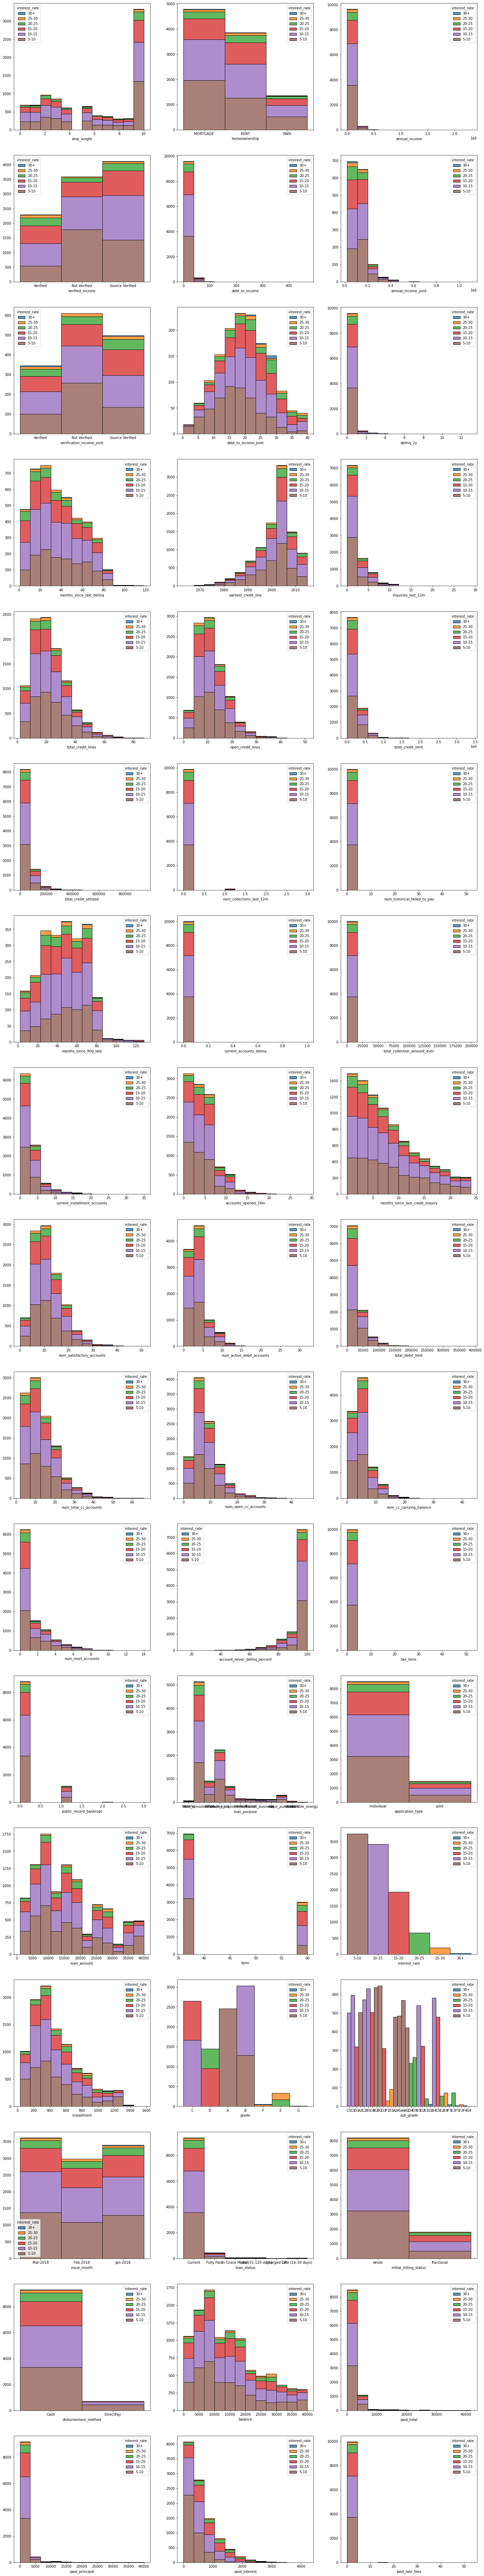

In [176]:
fig, axes = plt.subplots(17, 3, figsize=(24, 136))
i = 0
for col in df.columns:
    if(col in ['emp_title', 'state', 'num_accounts_30d_past_due', 'num_accounts_120d_past_due']):
        continue
    g = sns.histplot(data = df, x = col, ax = axes[i//3, i%3], bins=12, hue = 'interest_rate',\
                     multiple="stack", hue_order=['30+', '25-30', '20-25', '15-20', '10-15', '5-10'])
    g.set(ylabel=None)
    i += 1
plt.savefig('./hist.png')

### From the plot above, grade and sub_grade seemed to have high correlation to interest_rate

In [179]:
df['grade'] = pd.Categorical(df['grade'], sorted(df.grade.unique()))
df['sub_grade'] = pd.Categorical(df['sub_grade'], sorted(df.sub_grade.unique()))

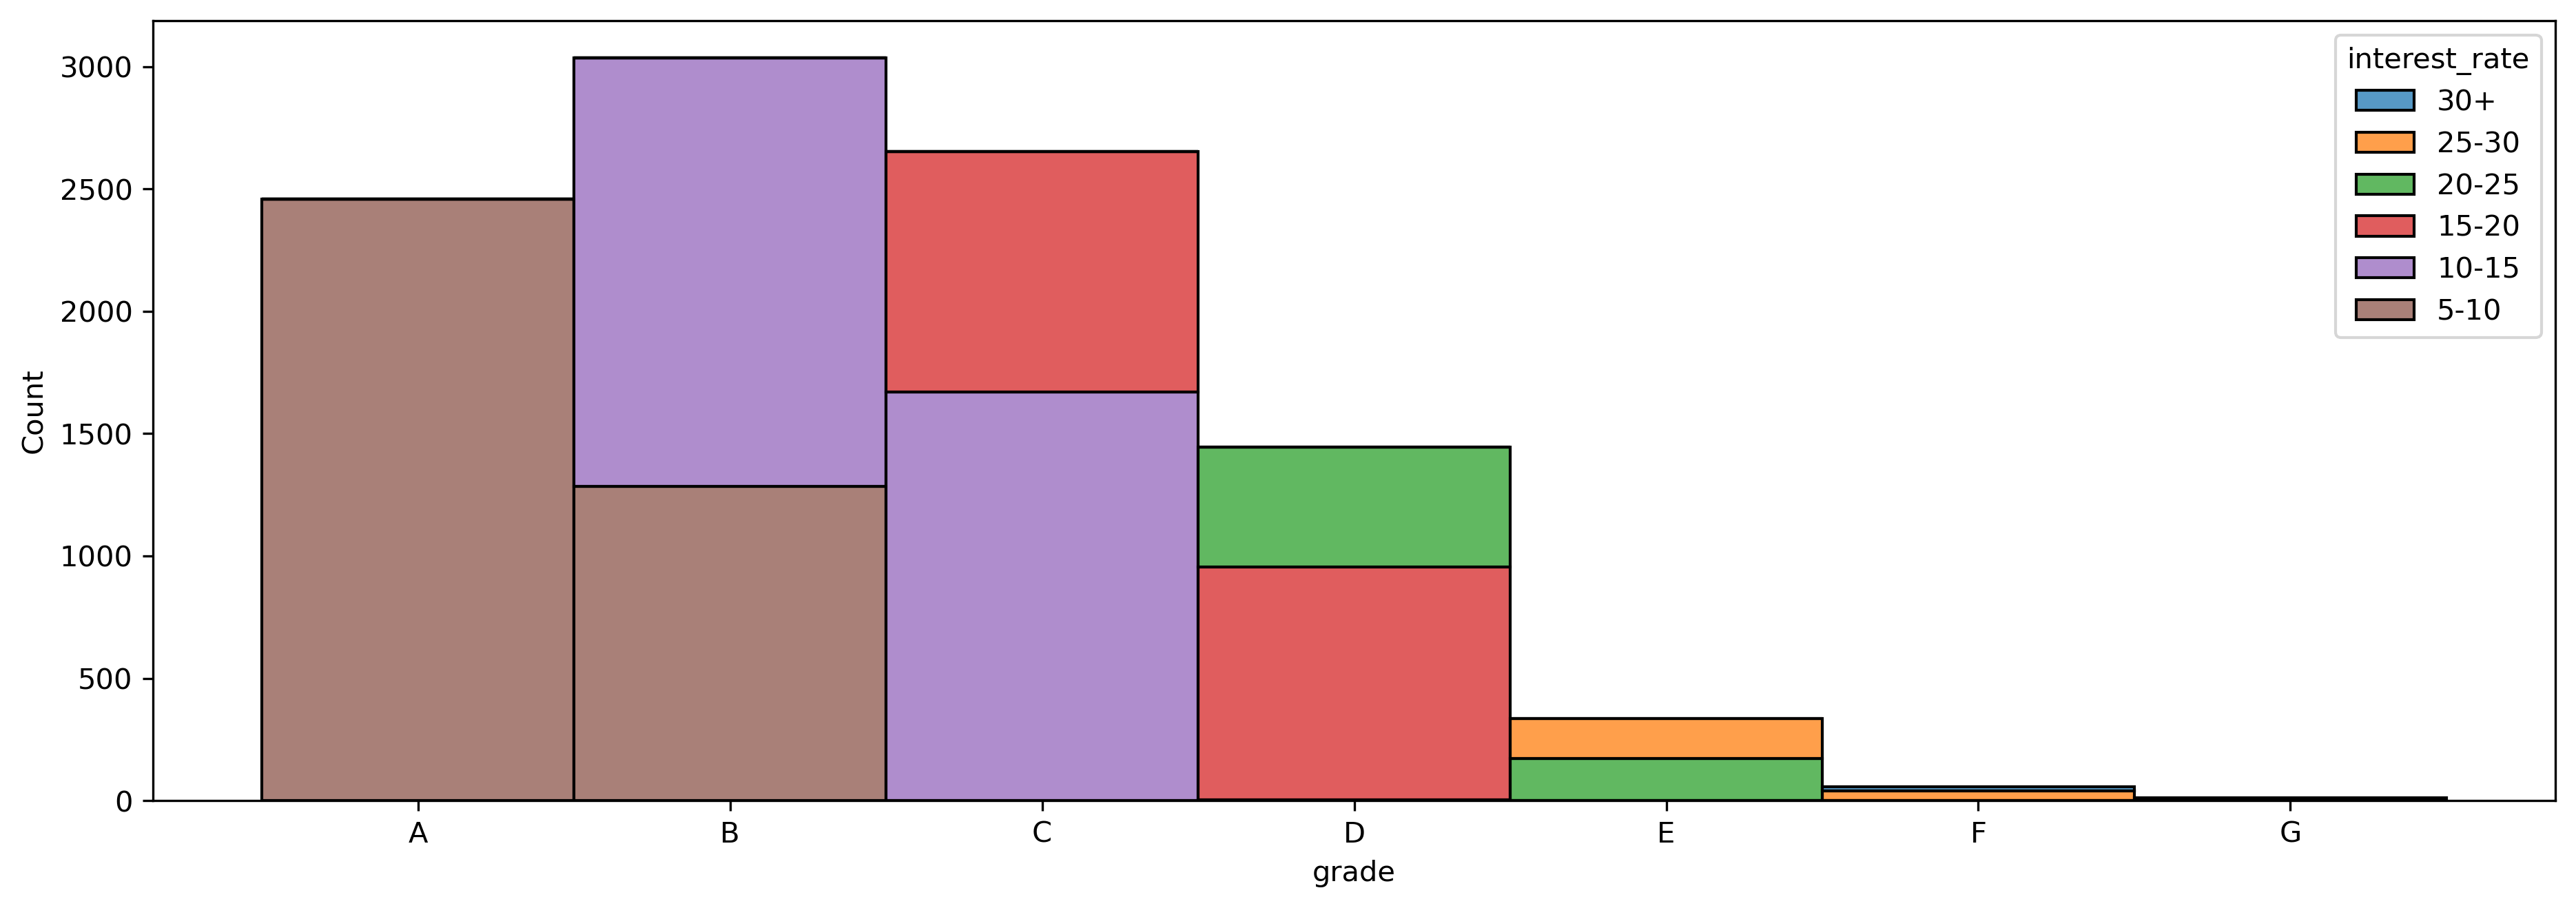

In [180]:
plt.figure(figsize=(15,5), dpi=300)
sns.histplot(data = df, x = 'grade', bins=12, hue = 'interest_rate',\
                     multiple="stack", hue_order=['30+', '25-30', '20-25', '15-20', '10-15', '5-10'])
plt.savefig('./grade_hist.png')

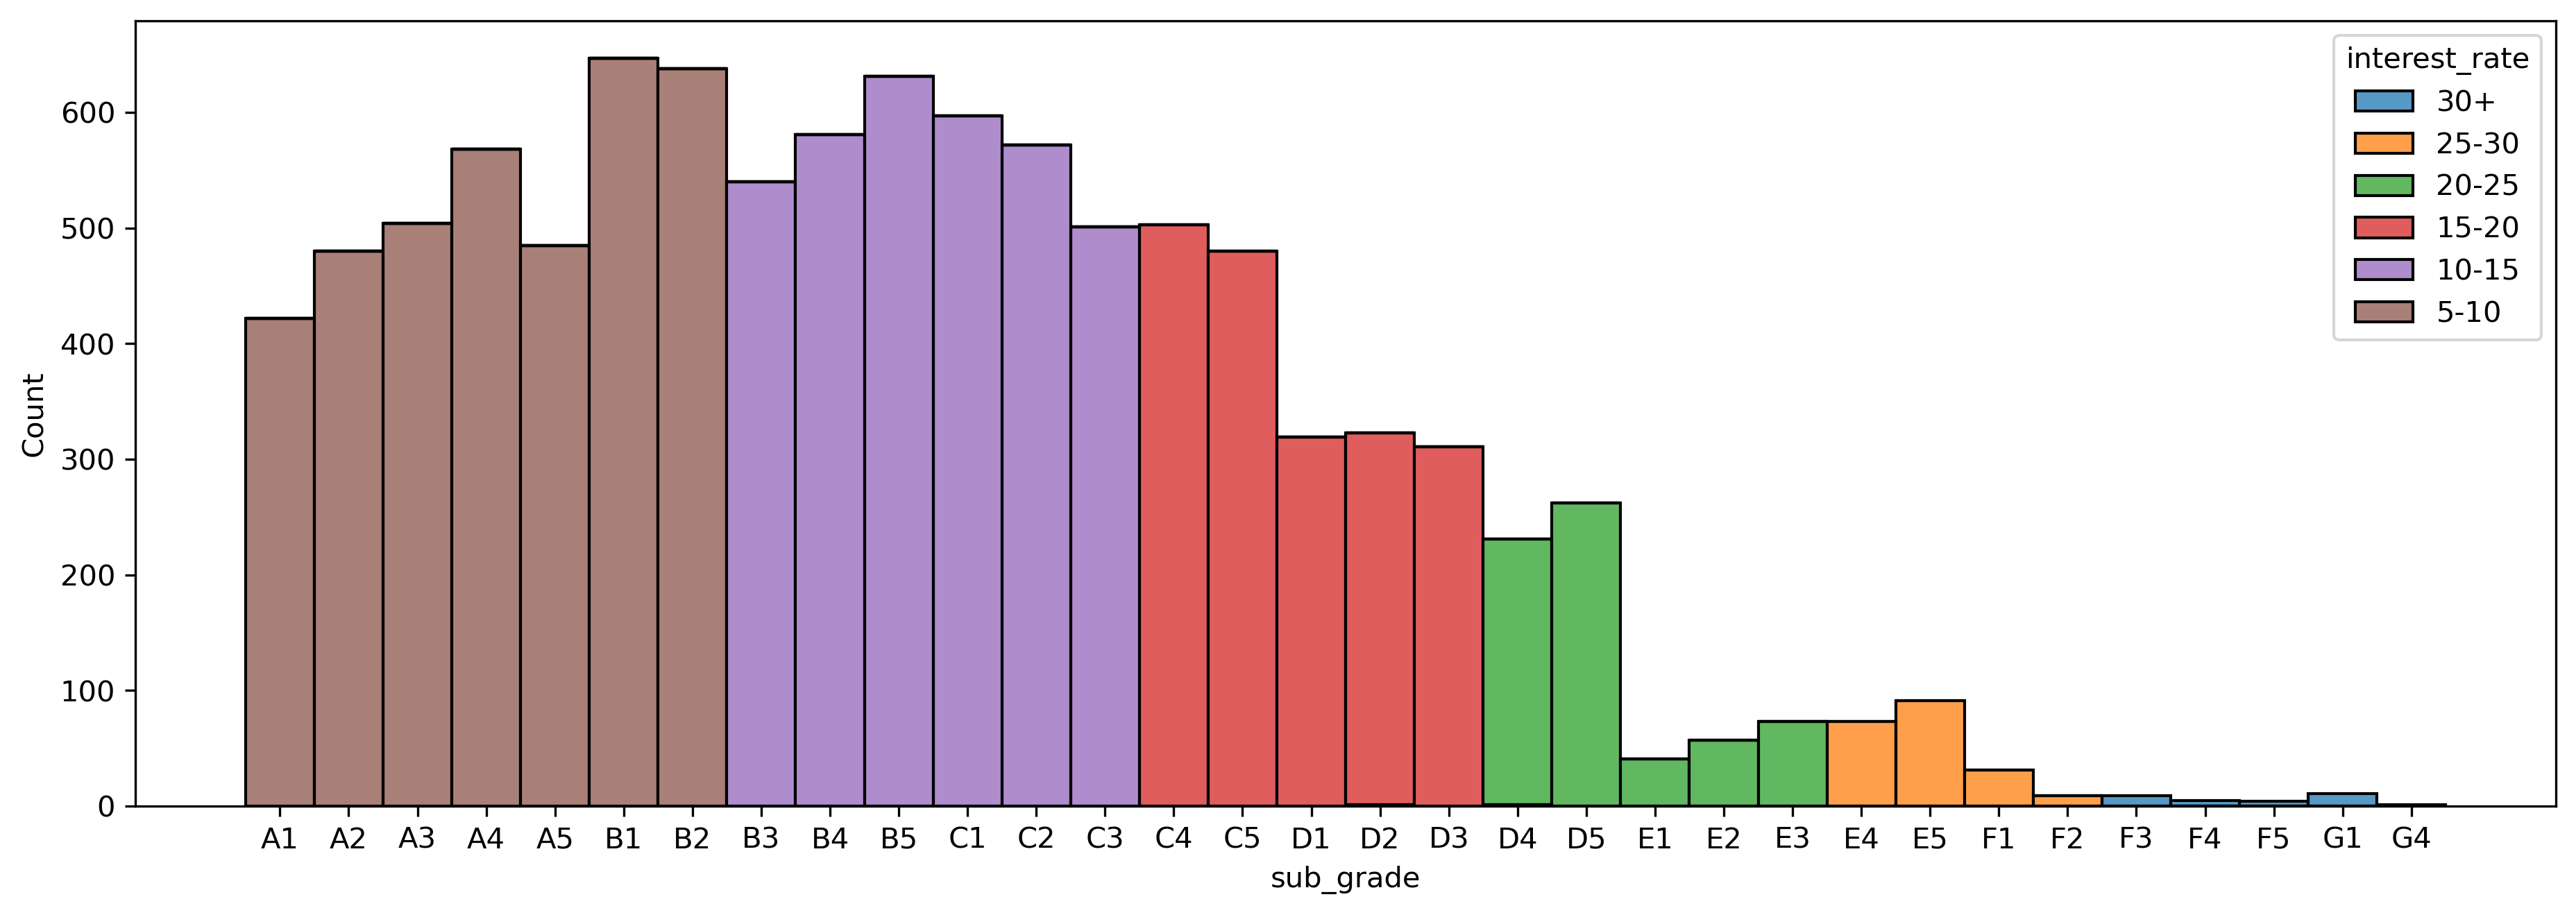

In [181]:
plt.figure(figsize=(15,5), dpi=300)
sns.histplot(data = df, x = 'sub_grade', bins=12, hue = 'interest_rate',\
                     multiple="stack", hue_order=['30+', '25-30', '20-25', '15-20', '10-15', '5-10'])
plt.savefig('./sub_grade_hist.png')

# Read and clean data for analysis

In [2]:
df = pd.read_csv('./loans_full_schema.csv')

In [194]:
pd.get_dummies(df.grade, prefix='grade')

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0
9996,0,0,0,1,0,0,0
9997,0,0,0,0,1,0,0
9998,1,0,0,0,0,0,0


In [3]:
df = df.join(pd.get_dummies(df.grade, prefix='grade'))
df = df.join(pd.get_dummies(df.sub_grade, prefix='sub_grade'))

In [4]:
df.drop(['grade', 'sub_grade'], axis = 1, inplace=True)
df.drop(['num_accounts_120d_past_due', 'num_accounts_30d_past_due', 'current_accounts_delinq', 'paid_total'],\
        axis=1, inplace=True)

In [5]:
X = df.select_dtypes(include=np.number).drop('interest_rate', axis = 1)
X.fillna(0, inplace=True)
y = df.interest_rate
y.fillna(0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [7]:
reg.score(X_test, y_test)

0.9997839430800076

In [9]:
coef_df = pd.DataFrame({'col_name': X.columns, 'coef': reg.coef_}, columns = ['col_name', 'coef'])

coef_df.sort_values(by = 'coef', key = abs, ascending= False).head(10)

,col_name,coef
37,grade_A,-10.387037
42,grade_F,9.043619
43,grade_G,7.785814
38,grade_B,-7.177296
41,grade_E,4.704102
39,grade_C,-4.063920
75,sub_grade_G4,3.895786
74,sub_grade_G1,3.890028
44,sub_grade_A1,-3.449086
45,sub_grade_A2,-2.685139


In [17]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.12592532419689073

In [28]:
df = pd.read_csv('./loans_full_schema.csv')
df['sub_grade'] = pd.Categorical(df['sub_grade'], sorted(df.sub_grade.unique()))
pred_df = df.iloc[X_test.index]
pred_df = pred_df.reset_index(drop = True)
pred_df = pred_df.join(pd.DataFrame(reg.predict(X_test), columns=['predicted_interest_rate']))

In [11]:
pred_df = pred_df.join(pd.DataFrame(pred_df.interest_rate - pred_df.predicted_interest_rate\
                                    , columns=['prediction_error']))

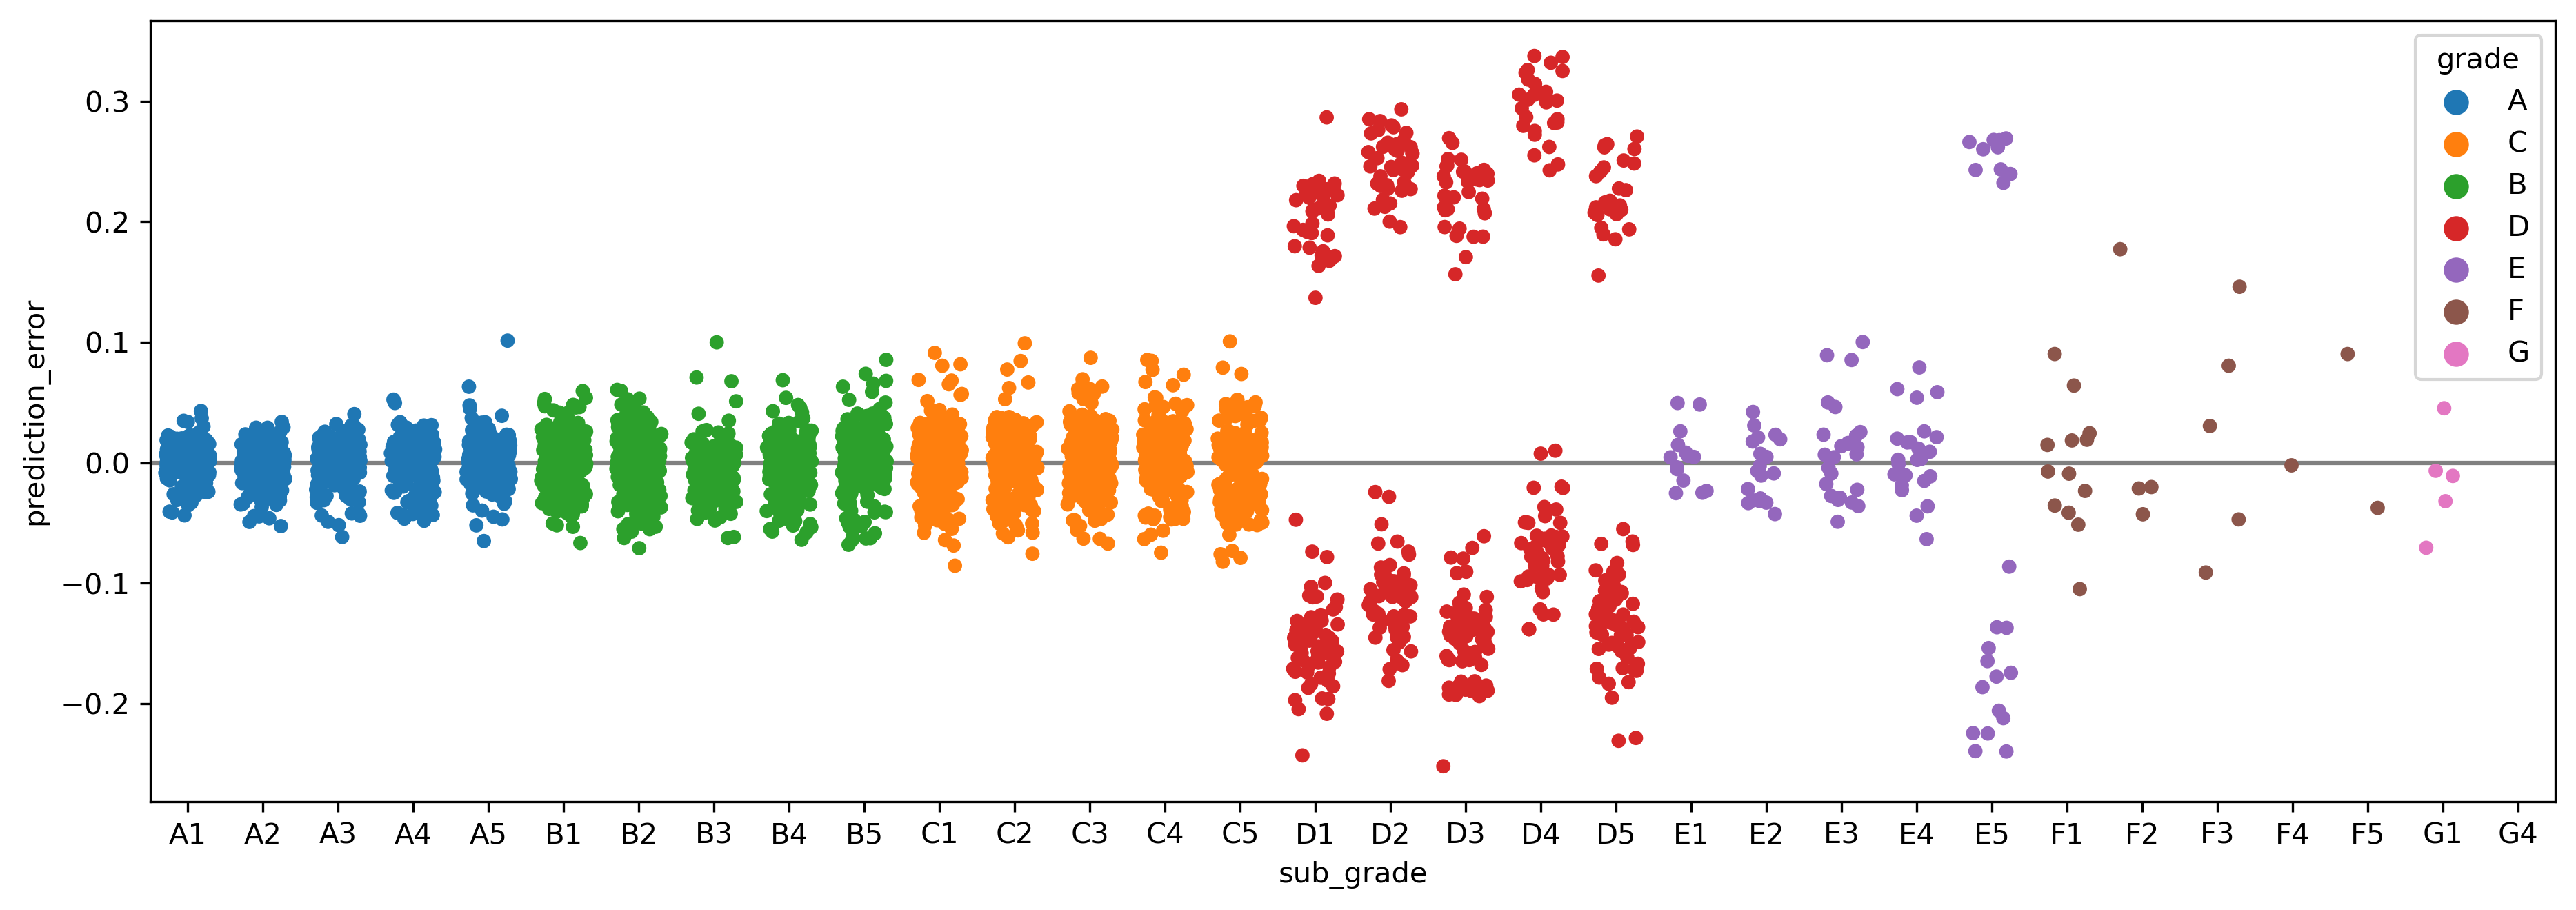

In [15]:
plt.figure(figsize=(15,5), dpi=300)

sns.stripplot(data = pred_df, x = 'sub_grade', y = 'prediction_error', jitter = 0.3, hue = 'grade')
plt.axhline(y=0, color='grey', linestyle='-')
plt.savefig('./linearReg.png')